In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("record.csv")

df

,mask_percent,mlm_acc_each_epoch,mlm_loss_each_epoch
0,15,"[[0.33180474265371385, 0.41084897121824654, 0....","[[0.07434512674808502, 0.04399368539452553, 0...."
1,14,"[[0.33285103584347253, 0.4132851035843473, 0.4...","[[0.07755900919437408, 0.08269260823726654, 0...."
2,13,"[[0.3196505339065317, 0.40840382748578563, 0.4...","[[0.08544578403234482, 0.07022812217473984, 0...."
3,12,"[[0.3215590742996346, 0.41100791717417784, 0.4...","[[0.08821828663349152, 0.044293925166130066, 0..."
4,11,"[[0.3226237169323208, 0.40231995326712844, 0.4...","[[0.07371237128973007, 0.04995165765285492, 0...."
...,...,...,...
57,6,"[[0.045319905213270145, 0.1124111374407583, 0....","[[0.43643301725387573, 0.16552908718585968, 0...."
58,7,"[[0.025515463917525773, 0.10760309278350516, 0...","[[0.41303664445877075, 0.14439035952091217, 0...."
59,6,"[[0.02963877740043223, 0.10805804260574252, 0....","[[0.3639524579048157, 0.13413465023040771, 0.0..."
60,7,"[[0.02575500065368022, 0.10275853052686626, 0....","[[0.4244529604911804, 0.26878711581230164, 0.0..."


In [2]:
epochs = [i for i in range(10)]

In [3]:
mlm_acc = []
for i in range(len(df['mask_percent'])):
    df.iloc[i][1]
    acc_this_percent = df.iloc[i][1][2:-2].split(',')
    for i in range(len(acc_this_percent)):
        acc_this_percent[i] = float(acc_this_percent[i])
    mlm_acc.append(acc_this_percent)

IndexError: list index out of range

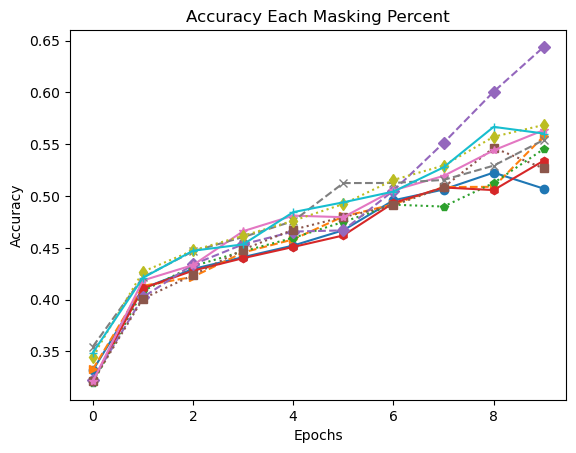

In [4]:
plt.title("Accuracy Each Masking Percent")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
line_style = ["-", "--", ":", "-", "--", ":", "-", "--", ":", "-"]
mark = ["o", ">", "p", "h", "D", "s", "*", "x", "d", "+"]
plt.rcParams["figure.figsize"] = (9, 6)
for i in range(len(df['mask_percent'])):
    plt.plot(epochs, mlm_acc[i], linestyle=line_style[i], marker=mark[i])

plt.legend([i for i in df['mask_percent']], loc ="lower right", title = "Masking %", ncol = 2) 
plt.show()

In [ ]:
mlm_loss = []
for i in range(len(df['mask_percent'])):
    df.iloc[i][2]
    acc_this_percent = df.iloc[i][2][2:-2].split(',')
    for i in range(len(acc_this_percent)):
        acc_this_percent[i] = float(acc_this_percent[i])
    mlm_loss.append(acc_this_percent)

<function matplotlib.pyplot.show(close=None, block=None)>

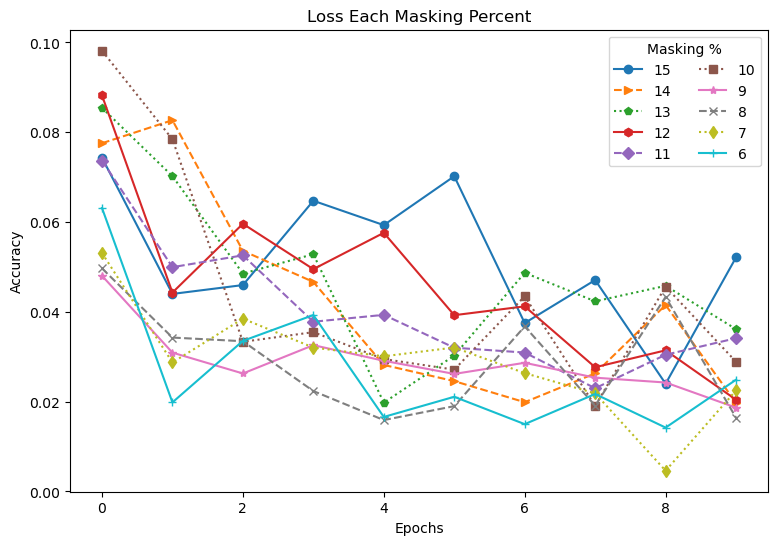

In [ ]:
plt.title("Loss Each Masking Percent")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
line_style = ["-", "--", ":", "-", "--", ":", "-", "--", ":", "-"]
mark = ["o", ">", "p", "h", "D", "s", "*", "x", "d", "+"]
for i in range(len(df['mask_percent'])):
    plt.plot(epochs, mlm_loss[i], linestyle=line_style[i], marker=mark[i])

plt.legend([i for i in df['mask_percent']], title = "Masking %", ncol = 2) 
plt.show